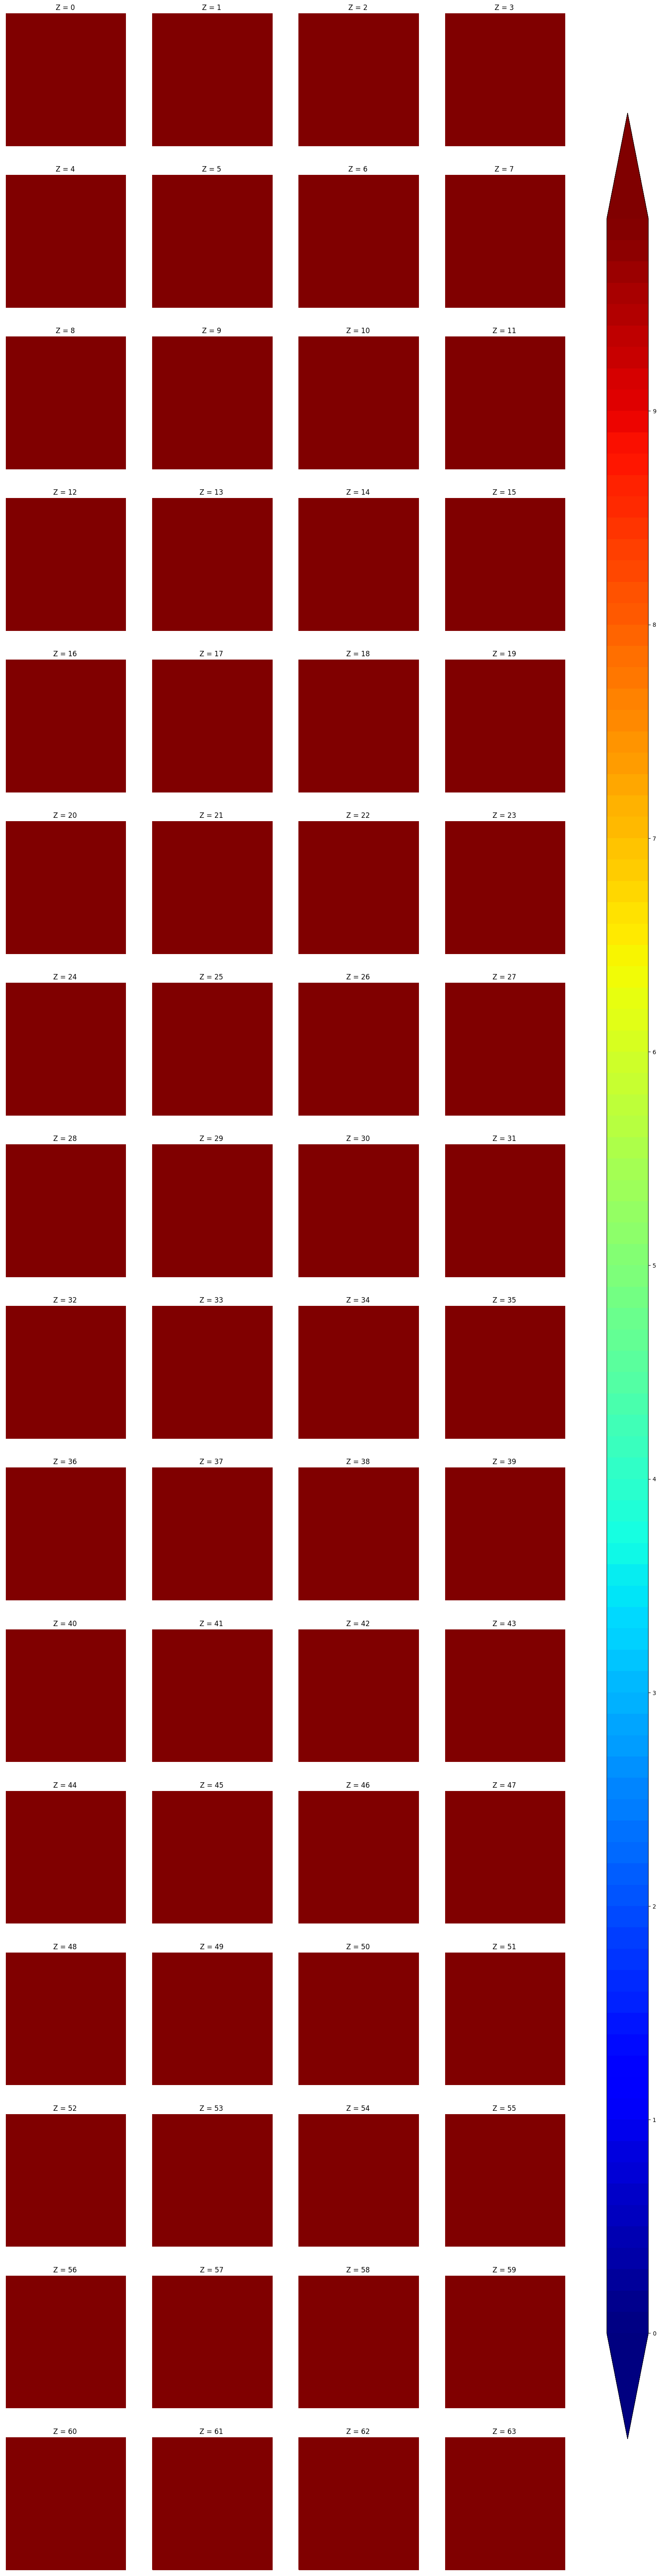

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import griddata

def grid(x, xmin, xmax, y, ymin, ymax, z, resX=500, resY=500):
    xi = np.linspace(xmin, xmax, resX)
    yi = np.linspace(ymin, ymax, resY)
    Z = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

mpl.rc('image', cmap='jet')
plt.rcParams["figure.figsize"] = (15, 6)

density_data = np.loadtxt('parameters/wind_density_output.csv', delimiter=',', skiprows=1)
density_data = density_data.reshape((64, 64, 64))

xpos = np.linspace(1, 65, 64)
ypos = np.linspace(1, 65, 64)
xpos, ypos = np.meshgrid(xpos, ypos)

levels = np.arange(0, 10.0, 0.1)

plots_per_row = 4
num_slices = density_data.shape[2]
num_rows = (num_slices + plots_per_row - 1) // plots_per_row  

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 5 * num_rows))

for z_slice_index in range(num_slices):
    row = z_slice_index // plots_per_row
    col = z_slice_index % plots_per_row
    
    density_slice = density_data[:, :, z_slice_index]
    density_slice = np.log10(density_slice / 2.3e-24)
    X, Y, Z = grid(xpos.flatten(), xpos.min(), xpos.max(), ypos.flatten(), ypos.min(), ypos.max(), density_slice.flatten())
    
    ax = axes[row, col]
    im = ax.contourf(X, Y, Z, levels=levels, extend='both')
    ax.set_title(f'Z = {z_slice_index}')
    ax.set_xlim(0, 65)
    ax.set_ylim(0, 65)
    ax.axis('off') 


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()
